<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
mean = sum(sales) / len(sales)
variance_sqrs = 0
for num in sales:
  variance_sqrs += (num - mean)**2

In [0]:
variance = variance_sqrs / (len(sales) - 1)

In [0]:
standard_dev = variance**.5

In [6]:
print(mean)
print(variance)
print(standard_dev)

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
data = {'sales': sales, 'customers': customers}

sales_matrix = pd.DataFrame(data)

In [9]:
sales_matrix

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [10]:
sales_matrix.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
mean_customers = sum(customers) / len(customers)

variance_sqrs_customers = 0
for num in customers:
  variance_sqrs_customers += (num - mean_customers)**2
variance_customers = variance_sqrs_customers / (len(customers) -1)
standard_dev_customers = variance_customers**.5

In [16]:
standard_dev_customers

17.057326313123664

In [0]:
# Determine the correlation coefficient by finding the covariance of 
# sales and customers, then dividing that by the product of their 
# standard deviations.

r = 7604.357143 / (standard_dev * standard_dev_customers)

In [19]:
# A very strong correlation between sales and customers
r

0.962833977832979

In [20]:
# The np function checks out
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
titanic_df.dtypes

titanic_df = titanic_df.drop(columns=['name','sex','ticket','cabin','embarked','boat','home.dest', 'body'])

In [0]:
#Apparently the data wasn't completely clean. Dropped na values
titanic_df.isnull().sum()
titanic_df = titanic_df.dropna()

In [62]:
titanic_df.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [58]:
titanic_cov = titanic_df.cov()
titanic_cov

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,142758.852129,284.266312,-53.841414,-1458.534777,26.066613,1.342019,-9410.735123,-95.373542
pclass,284.266312,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-53.841414,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-1458.534777,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,26.066613,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,1.342019,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.373542,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [67]:
titanic_corr = titanic_df.corr()
titanic_corr

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

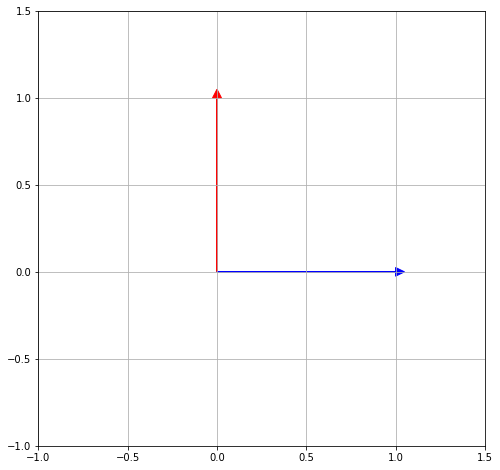

In [81]:
# orthogonal means at right angles to each other

a = [0,1]
b = [1,0]

plt.figure(figsize=(8,8))
plt.grid()
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.arrow(0,0,a[0],a[1], head_width = .05, head_length = .05, color='red')
plt.arrow(0,0,b[0],b[1],head_width = .05, head_length = .05, color='blue');

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [85]:
a = np.array([-5,3,7])
b= np.array([6,-8,2])

#The two vectors are not orthogonal because the dot product is not zero
sum(a*b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [90]:
#sum of squares, then sq root for the norm
np.linalg.norm(c)**2

665.0

In [87]:
c**2

array([  4, 225,  36, 400])

In [88]:
c.T*c

array([  4, 225,  36, 400])

In [0]:
#The sum of each is equal to 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [94]:
f = np.array([4,12,11,9,2])
f_unit = (1 / np.linalg.norm(f)) * f
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

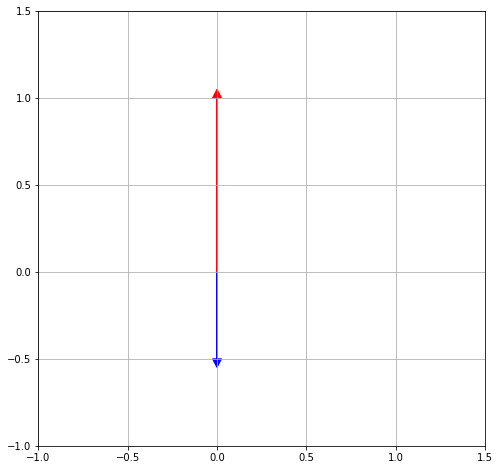

In [98]:
#linearly dependent 
a = [0,1]
b = [0,-.5]

plt.figure(figsize=(8,8))
plt.grid()
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.arrow(0,0,a[0],a[1], head_width = .05, head_length = .05, color='red')
plt.arrow(0,0,b[0],b[1],head_width = .05, head_length = .05, color='blue');

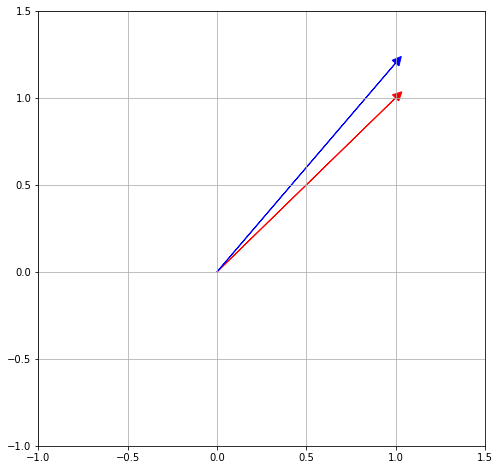

In [112]:
#linearly independent 
a = [1,1]
b = [1,1.2]

plt.figure(figsize=(8,8))
plt.grid()
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.arrow(0,0,a[0],a[1], head_width = .05, head_length = .05, color='red')
plt.arrow(0,0,b[0],b[1],head_width = .05, head_length = .05, color='blue');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [111]:
g = np.array([1,2])
h = np.array([4,8])

G = np.array([g,h])
np.linalg.matrix_rank(G)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [109]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])

L = np.array([l,m,n])
np.linalg.matrix_rank(L)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



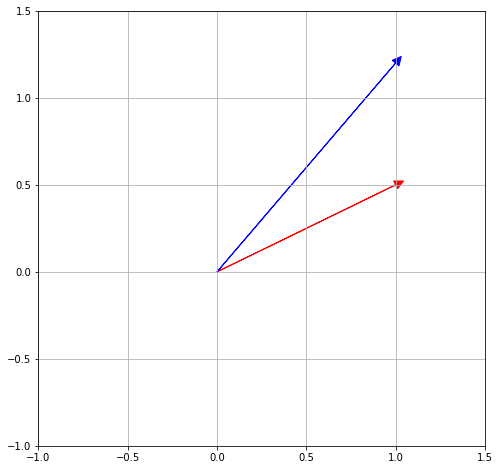

In [115]:
a = [1,.5]
b = [1,1.2]

plt.figure(figsize=(8,8))
plt.grid()
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.arrow(0,0,a[0],a[1], head_width = .05, head_length = .05, color='red')
plt.arrow(0,0,b[0],b[1],head_width = .05, head_length = .05, color='blue');

## 6.2 What does it mean to form a basis?

A basis is just the vectors that through scaling and linear combination can fill the span of the dimension. 

Any two linearly independent veectors can be the basis of a two-dimensional plane.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [117]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us how many dimensions the span of the matrix is. A rank of three means the matrix spans 3 dimensions

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

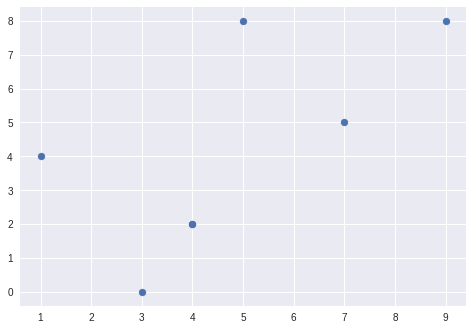

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()